In [2]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

# Image Denoising with Python

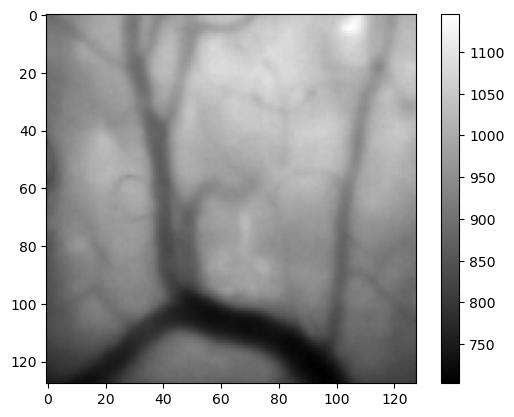

In [12]:
image = tiff.imread('data/page_1.tif')
plt.imshow(image, cmap='gray')
plt.colorbar()

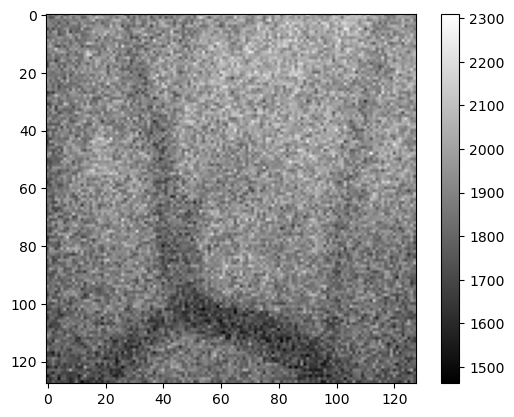

In [20]:
image = tiff.imread('data/page_1.tif')
mean = 1.0*np.median(image)
sigma = 1.0*np.std(image)
gaussian_noise = np.random.normal(mean, sigma, image.shape)
noisy_image = image + gaussian_noise
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()

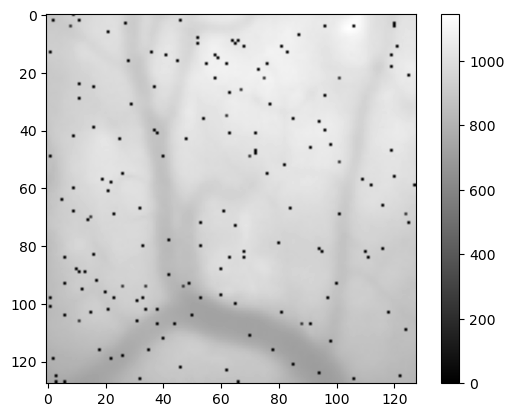

In [23]:
salt_prob = 0.001
pepper_prob = 0.01
noisy_image = np.copy(image)
salt_noise = np.random.rand(*image.shape) < salt_prob
pepper_noise = np.random.rand(*image.shape) < pepper_prob
noisy_image[salt_noise] = 255  # White salt noise
noisy_image[pepper_noise] = 0  # Black pepper noise
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()

---

Text(0.5, 1.0, 'Mean Filtered Image')

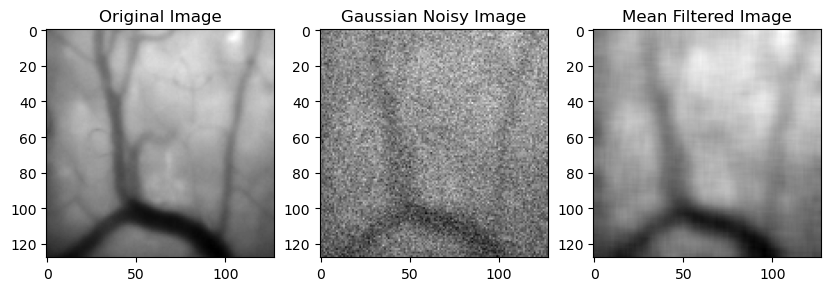

In [32]:
from scipy.ndimage import uniform_filter

kernel_size = 10
mean = 1.0*np.median(image)
sigma = 1.0*np.std(image)
gaussian_noise = np.random.normal(mean, sigma, image.shape)
noisy_image = image + gaussian_noise
mean_filtered_image = uniform_filter(noisy_image, size=kernel_size)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.subplot(1, 3, 3)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title('Mean Filtered Image')

---

Text(0.5, 1.0, 'Mean Filtered Image')

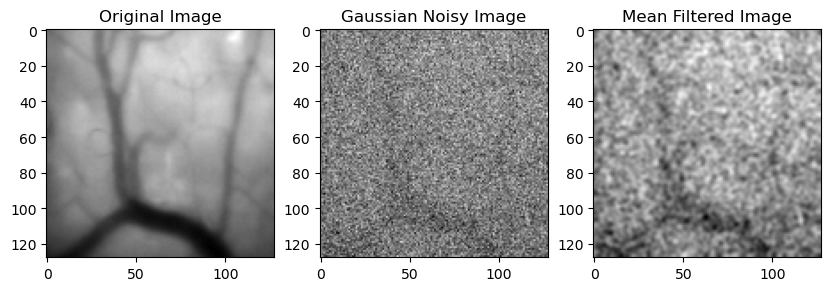

In [42]:
import cv2

kernel_size = 10
mean = 1.0*np.median(image)
sigma = 3.0*np.std(image)
gaussian_noise = np.random.normal(mean, sigma, image.shape)
noisy_image = image + gaussian_noise

kernel_size=(5, 5)
sigmaX=0
gaussian_blur_filtered_image = cv2.GaussianBlur(noisy_image, kernel_size, sigmaX)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur_filtered_image, cmap='gray')
plt.title('Mean Filtered Image')

Text(0.5, 1.0, 'Residual')

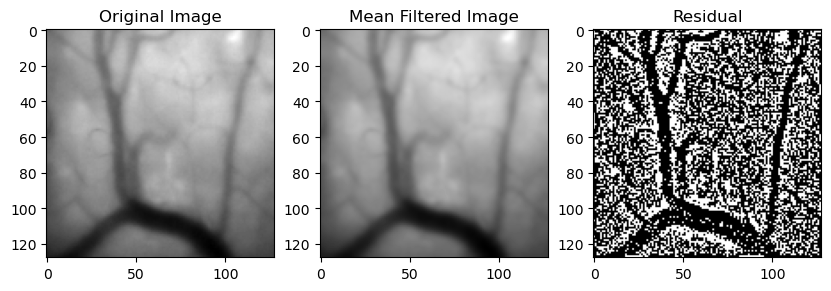

In [55]:
# Gaussian blur on original image

import cv2

kernel_size=(3, 3)
sigmaX=0
gaussian_blur_filtered_image = cv2.GaussianBlur(image, kernel_size, sigmaX)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur_filtered_image, cmap='gray')
plt.title('Mean Filtered Image')
plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur_filtered_image-image, cmap='gray')
plt.title('Residual')




Text(0.5, 1.0, 'Mean Filtered Image')

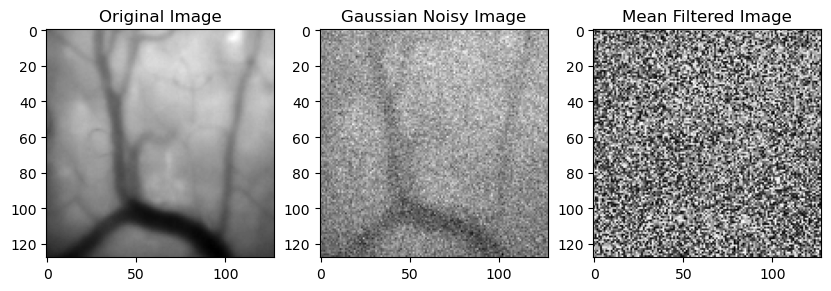

In [48]:
kernel_size = 10
mean = 1.0*np.median(image)
sigma = 1.0*np.std(image)
gaussian_noise = np.random.normal(mean, sigma, image.shape)
noisy_image = image + gaussian_noise

h=10
template_window_size=7
search_window_size=3
non_local_means_image = cv2.fastNlMeansDenoising(noisy_image.astype(np.uint8), None, h, template_window_size, search_window_size)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.subplot(1, 3, 3)
plt.imshow(non_local_means_image, cmap='gray')
plt.title('Mean Filtered Image')

## Understanding noise

## Basic Image Denoising Techniques

## Advanced Image Denoising Techniques

## Denoising in Frequency Domain